# HW3

**Deadline:** 24.11.2024 23:59 (GMT+5)

## Task 3.1 (2 points)

Let $x_1, \dots, x_n \sim U[0,1]$. Sort them in the nondecreasing order:

$$
    x_{(1)} \leqslant x_{(2)} \leqslant \ldots \leqslant x_{(k)} \leqslant\ldots\leqslant x_{(n)}.
$$

The $k$-th element $x_{(k)}$ in this sequence is called **$k$-th order statistics**. Show that $x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$. Do it in two ways:

* **experimentally**: generate a random matrix of shape $N \times n$ (try $N = 1000, 10000, 100000$), calculate $k$-th order statistics for each row and plot historgram of these values along with pdf of beta distribution. (**1 point**)

* **theoretically**: present a mathematical proof of this statement (**1 point**)

```{warning}
To get full points for the experimental part you should avoid pythonic loops when generating random matrix. The only place where `for` loop is allowed is iterating over several values of $N$.
```

### YOUR SOLUTION HERE

Your historgram for a paticular value of $N$ should look like this:

### Theoretically solution


Let's prove that $x_{(k)} \sim \mathrm{Beta}(k, n+1 -k)$.
1) Distribution $x_1, \dots, x_n \sim U[0,1]$ means that for each point $x_i$ :
   $$ P(x \leqslant z) = z, P(x > z) = 1 - z $$
2) That $x_{(k)} \leqslant z$, should be equal $k - 1$ fewer elements $z$, and $n - k + 1$ elements are greater than $z$. The probability of this event is expressed through the binomial distribution.
3) After calculating the density $x_{(k)}$, 
it coincides with $Beta(k, n - k + 1)$.

### Experimentally solution

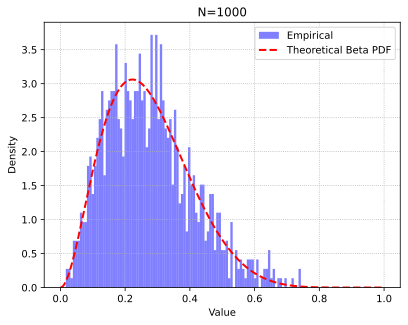

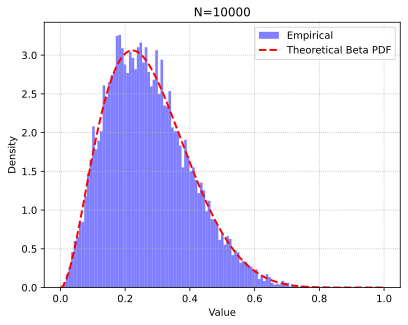

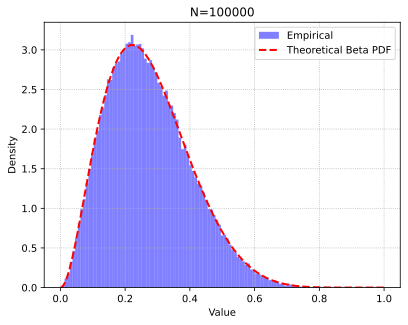

In [1]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

def experimental_beta_hist(N, n, k):
    """
    Генерация выборок для k-й порядковой статистики,
    построение гистограммы и наложение теоретической Beta-плотности.

    :param N: Количество строк (экспериментов)
    :param n: Размер выборки
    :param k: Индекс порядковой статистики (1 ≤ k ≤ n)
    """
    data = np.random.uniform(0, 1, size=(N, n))  
    data_sorted = np.sort(data, axis=1) 
    k_stat = data_sorted[:, k-1]        

    plt.hist(k_stat, bins=100, density=True, color='b', alpha=0.5, label="Empirical")

    #Beta(k, n+1-k)
    xs = np.linspace(0, 1, num=1000)
    plt.plot(xs, beta(k, n+1-k).pdf(xs), c='r', lw=2, ls="--", label="Theoretical Beta PDF")
    plt.grid(ls=":")
    plt.legend()
    plt.title(f"N={N}")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

experimental_beta_hist(N=1000, n=10, k=3)
experimental_beta_hist(N=10000, n=10, k=3)
experimental_beta_hist(N=100000, n=10, k=3)

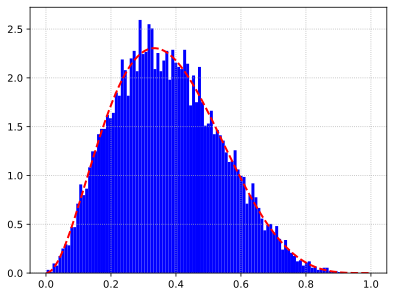

In [2]:
from scipy.stats import beta, gamma
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

def beta_hist(a, b, N=10000):
    xs = np.linspace(0.001, 0.999, num=1000)
    plt.hist(beta(a, b).rvs(size=N), bins=100, color='b', density=True)
    plt.plot(xs, beta(a, b).pdf(xs), c='r', lw=2, ls="--")
    plt.grid(ls=":")
    
beta_hist(3, 5)

## Task 3.2 (2 points)

* Find KL divergence between $p\sim \mathrm{Geom}(s)$ and $q\sim \mathrm{Geom}(t)$, $0 < s, t < 1$. Is $\mathbb{KL}(p, q) = 0$ when $s = t$? Does equality $\mathbb{KL}(p, q) = \mathbb{KL}(q, p)$ hold? (**1.5 points**)

* Plot the graphs of $\mathbb{KL}(p, q)$ as functions of $s$ for several fixed values of $t$. (**0.5 points**)

### YOUR SOLUTION HERE

### Theoretically solution

For geometric distribution:
$$ p_k = (1 - s)^{k-1} s, q_k = (1 - t)^{k-1}t $$
Let's substitute into the KL-divergence formula:
$$ KL(p,q) = \sum_{k=1}^{\infty} (1 - s)^{k-1}s \cdot log\frac{(1-s)^{k-1}s}{(1-t)^{k-1}t} $$
Let's expand the logarithm:
$$ log\frac{(1-s)^{k-1}s}{(1-t)^{k-1}t} = (k-1) log \frac{1-s}{1-t} + log \frac{s}{t} $$
Let's put this into the formula:
$$ KL(p,q) = \sum_{k=1}^{\infty} (1 - s)^{k-1}s ((k-1) log \frac{1-s}{1-t} + log \frac{s}{t}) $$
Let's break it down into two terms:

1) For the first member:
$$ \sum_{k=1}^{\infty} (1 - s)^{k-1}s(k - 1) = \frac{1-s}s $$
2) For the second member:
$$ \sum_{k=1}^{\infty} (1 - s)^{k-1}s = 1 $$
Final formula:
$$ KL(p,q) = \frac{1-s}s log \frac{1-s}{1-t} + log \frac{s}{t} $$

### Experimentally solution

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def kl_divergence(s, t):
    """
    Вычисление KL-дивергенции между двумя геометрическими распределениями.
    
    :param s: Вероятность успеха для распределения p
    :param t: Вероятность успеха для распределения q
    :return: Значение KL(p || q)
    """
    if s == t:
        return 0
    term1 = ((1 - s) / s) * np.log((1 - s) / (1 - t))
    term2 = np.log(s / t)
    return term1 + term2

s, t = 0.3, 0.5
print(f"KL(p || q) for s={s}, t={t}: {kl_divergence(s, t)}")

KL(p || q) for s=0.3, t=0.5: 0.27427626168350605


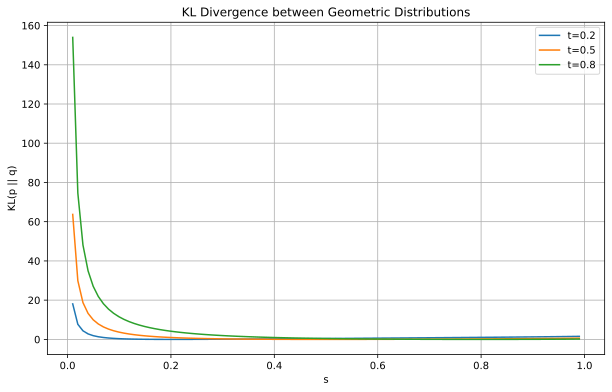

In [4]:
s_values = np.linspace(0.01, 0.99, 100)  
t_values = [0.2, 0.5, 0.8]               

plt.figure(figsize=(10, 6))
for t in t_values:
    kl_values = [kl_divergence(s, t) for s in s_values]
    plt.plot(s_values, kl_values, label=f't={t}')

plt.xlabel('s')
plt.ylabel('KL(p || q)')
plt.title('KL Divergence between Geometric Distributions')
plt.legend()
plt.grid()
plt.show()

## Task 3.3 (2 points)

For a one-dimensional gaussian $\xi \sim \mathcal N(\mu, \sigma^2)$ there are well-known rules of one, two and three sigmas:

* one-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant \sigma) = \Phi(1) - \Phi(-1) \approx 0.6827$ 
* two-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 2\sigma) = \Phi(2) - \Phi(-2) \approx 0.9545$ 
* three-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 3\sigma) = \Phi(3) - \Phi(-3) \approx 0.9973$ 

```{figure} https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201202/20120208160239-1_0.jpg?itok=1X1a_HCs
:align: center
```

In [5]:
from scipy.stats import norm

norm.cdf(1) - norm.cdf(-1), norm.cdf(2) - norm.cdf(-2), norm.cdf(3) - norm.cdf(-3)

(np.float64(0.6826894921370859),
 np.float64(0.9544997361036416),
 np.float64(0.9973002039367398))

Compute analagous values for a 2-d gaussian distribution $\boldsymbol \xi \sim \mathcal N(\boldsymbol 0, \boldsymbol I_2)$. Namely, find $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3)$

* analytically (**1 point**)
* numerically, using `scipy` or Monte Carlo methods (**1 point**)

### YOUR SOLUTION HERE

### Analytically solution

Bivariate normal distribution $ \xi  \sim N(0, I_2) $ has a density:

$$ f(x,y) = \frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}} $$

In polar coordinates $(r = \sqrt{x^2 + y^2}) $ density is converted to:

$$ f(r) = r \cdot e^{-r^2/2}, r  \geqslant 0 $$

Probability $\mathbb P(\vert \xi \vert_2 \leqslant r)$ calculated as the integral over the radius:

$$\mathbb P(\vert \xi \vert_2 \leqslant r) = \int_{0}^{r} f(t)dt = \int_{0}^{r} t\cdot e^{-\frac{t^2}2}dt $$

This integral can be expressed in terms of the error function:

$$\mathbb P(\vert \xi \vert_2 \leqslant r) = 1 - e^{-r^2/2} $$

For $r = 1, 2, 3$:

$$\mathbb P(\vert \xi \vert_2  \leqslant 1) = 1 - e^{-1/2} \approx 0.3935 $$

$$\mathbb P(\vert \xi  \vert_2 \leqslant 2) = 2 - e^{-2} \approx 0.8687 $$

$$\mathbb P(\vert \xi \vert_2 \leqslant 3) = 3 - e^{-4.5} \approx 0.9890 $$

### Numerically solution

In [6]:
import numpy as np
from scipy.stats import multivariate_normal

def monte_carlo_probability(r, n_samples=100000):
    """
    Оценка вероятности P(||xi||_2 <= r) методом Монте-Карло для xi ~ N(0, I_2).

    :param r: Радиус
    :param n_samples: Количество случайных выборок
    :return: Оценка вероятности
    """
    samples = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=n_samples)
    norms = np.linalg.norm(samples, axis=1)  
    return np.mean(norms <= r)

radii = [1, 2, 3]
for r in radii:
    prob = monte_carlo_probability(r)
    print(f"P(||xi||_2 <= {r}) (Монте-Карло): {prob:.4f}")

P(||xi||_2 <= 1) (Монте-Карло): 0.3956
P(||xi||_2 <= 2) (Монте-Карло): 0.8647
P(||xi||_2 <= 3) (Монте-Карло): 0.9892


In [7]:
from scipy.integrate import quad

def probability_analytical(r):
    """
    Вычисление P(||xi||_2 <= r) аналитически через интеграл.

    :param r: Радиус
    :return: Значение вероятности
    """
    f = lambda t: t * np.exp(-t**2 / 2) 
    prob, _ = quad(f, 0, r)  
    return prob

for r in radii:
    prob = probability_analytical(r)
    print(f"P(||xi||_2 <= {r}) (Аналитически): {prob:.4f}")

P(||xi||_2 <= 1) (Аналитически): 0.3935
P(||xi||_2 <= 2) (Аналитически): 0.8647
P(||xi||_2 <= 3) (Аналитически): 0.9889


## Task 3.4 (1 point)


Let $X_1, \ldots, X_n$ is an i.i.d. sample form $U[0, 2\theta]$. The parameter $\theta$ can be estimated as
$\widehat\theta = \overline X_n$ (sample average) or $\tilde\theta = \mathrm{med}(X_1, \ldots, X_n)$ (sample median). According to [ML Handbook](https://education.yandex.ru/handbook/ml/article/parametricheskie-ocenki#svojstva-parametricheskih-ocenok), both estimations are unbiased, and $\mathbb V \widehat\theta = \frac{\theta^2}{3n}$, $\mathbb V \tilde\theta = \frac{\theta^2}{n+3}$. Hence, due to the central limit theorem

$$
    \widehat\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{3n}\Big), \quad
    \tilde\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{n+3}\Big), \quad n \gg 1.
$$

Plot two histograms on the same plot verifying this theoretical statements. Add two dashed lines for gaussians as it done {ref}`here <CLT>`. Try different values of $n$: $100$, $1000$, $10^4$, $10^5$.

### Theoretically solution

1) Sample average:
* It is known that the mean of a sample from a distribution $ U[0,2\theta]$ is an unbiased estimate for $\theta$. Its variance:
  $$ Var(\hat{\theta}) = \frac{\theta^2}{3n}$$
2) Sample median:
* Median for a sample from a uniform distribution $ U[0,2\theta]$ is also an unbiased estimator for $\theta$. Median of variance:
 $$ Var(\hat{\theta}) = \frac{\theta^2}{n+3}$$

### Experimentally solution

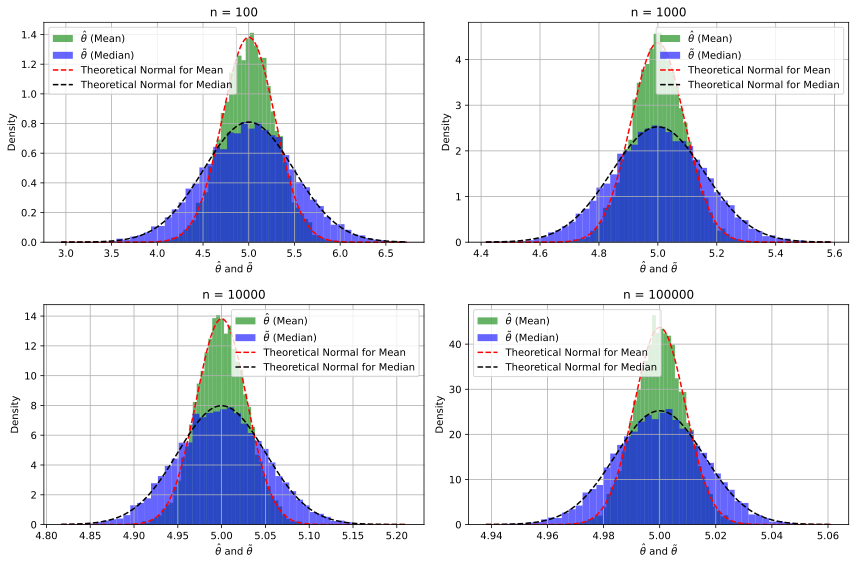

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def estimate_theta(n, theta, N=10000):
    """
    Генерация выборки из U[0, 2*theta], расчет среднего и медианы для каждой выборки.
    :param n: Размер выборки
    :param theta: Истинное значение параметра theta
    :param N: Количество экспериментов
    :return: Среднее и медиана для каждой выборки
    """
    means = []
    medians = []
    
    for _ in range(N):
        # Генерация выборки из U[0, 2*theta]
        sample = np.random.uniform(0, 2*theta, size=n)
        
        # Вычисление среднего и медианы
        means.append(np.mean(sample))
        medians.append(np.median(sample))
    
    # Преобразуем списки в numpy массивы
    means = np.array(means)
    medians = np.array(medians)
    
    return means, medians

theta = 5
n_values = [100, 1000, 10000, 100000]  # Разные значения n
N = 10000  # Количество экспериментов

plt.figure(figsize=(12, 8))

for n in n_values:
    means, medians = estimate_theta(n, theta, N)
    mean_theta = theta
    var_mean = theta**2 / (3 * n)
    var_median = theta**2 / (n + 3)
    
    plt.subplot(2, 2, n_values.index(n) + 1)
    plt.hist(means, bins=50, density=True, alpha=0.6, color='g', label=r'$\hat{\theta}$ (Mean)')
    plt.hist(medians, bins=50, density=True, alpha=0.6, color='b', label=r'$\tilde{\theta}$ (Median)')
    
    x = np.linspace(min(means.min(), medians.min()), max(means.max(), medians.max()), 1000)
    plt.plot(x, norm.pdf(x, mean_theta, np.sqrt(var_mean)), 'r--', label='Theoretical Normal for Mean')
    plt.plot(x, norm.pdf(x, mean_theta, np.sqrt(var_median)), 'k--', label='Theoretical Normal for Median')
    
    plt.title(f"n = {n}")
    plt.xlabel(r"$\hat{\theta}$ and $\tilde{\theta}$")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()